In [7]:
import numpy as np
import random
from collections import defaultdict
import matplotlib.pyplot as plt

In [8]:
class TicTacToe:
    def __init__(self):
        self.board = np.zeros((3, 3), dtype=int)
        self.current_winner = None

    def reset(self):
        self.board = np.zeros((3, 3), dtype=int)
        self.current_winner = None

    def make_move(self, row, col, player):
        if self.board[row, col] == 0:
            self.board[row, col] = player
            if self.check_winner(row, col, player):
                self.current_winner = player
            return True
        return False

    def check_winner(self, row, col, player):
        if np.all(self.board[row, :] == player) or np.all(self.board[:, col] == player):
            return True
        if row == col and np.all(np.diag(self.board) == player):
            return True
        if row + col == 2 and np.all(np.diag(np.fliplr(self.board)) == player):
            return True
        return False

    def available_moves(self):
        return [(r, c) for r in range(3) for c in range(3) if self.board[r, c] == 0]

    def is_full(self):
        return not np.any(self.board == 0)

    def display(self):
        print(self.board)

In [9]:
class QLearningAgent:
    def __init__(self, player, alpha=0.1, gamma=0.9, epsilon=0.1):
        self.player = player
        self.alpha = alpha
        self.gamma = gamma
        self.epsilon = epsilon
        self.q_table = defaultdict(float)

    def get_state(self, board):
        return tuple(map(tuple, board))

    def choose_action(self, game):
        state = self.get_state(game.board)
        if random.uniform(0, 1) < self.epsilon:
            return random.choice(game.available_moves())
        q_values = [self.q_table[(state, move)] for move in game.available_moves()]
        max_q_value = max(q_values)
        max_q_actions = [move for move in game.available_moves() if self.q_table[(state, move)] == max_q_value]
        return random.choice(max_q_actions)

    def learn(self, state, action, reward, next_state):
        next_q_values = [self.q_table[(next_state, move)] for move in game.available_moves()]
        best_next_q_value = max(next_q_values, default=0)
        self.q_table[(state, action)] += self.alpha * (reward + self.gamma * best_next_q_value - self.q_table[(state, action)])

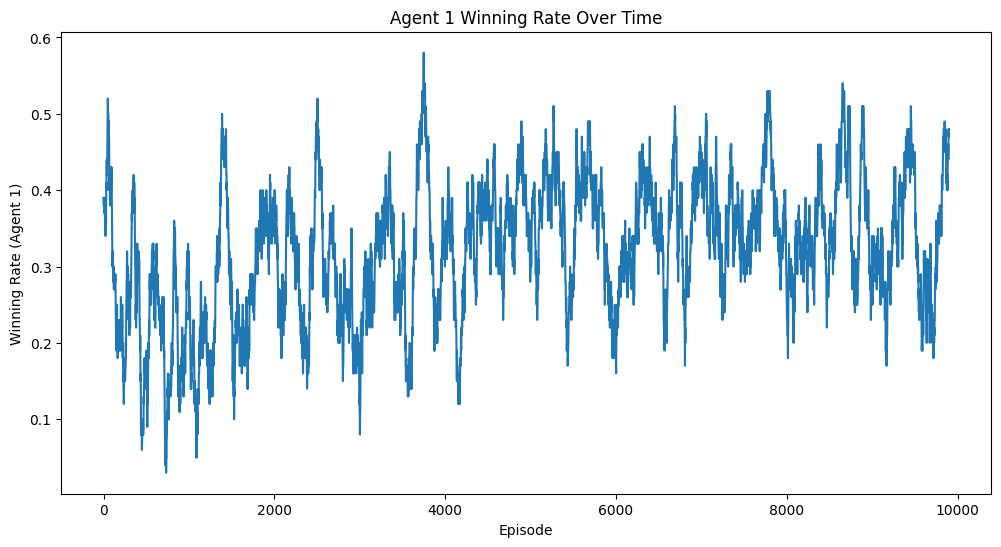

In [10]:
def play_game(agent1, agent2, game):
    current_agent = agent1
    other_agent = agent2
    game.reset()
    while True:
        state = agent1.get_state(game.board)
        action = current_agent.choose_action(game)
        game.make_move(action[0], action[1], current_agent.player)
        if game.current_winner is not None:
            current_agent.learn(state, action, 1, None)
            other_agent.learn(state, action, -1, None)
            return current_agent.player
        elif game.is_full():
            current_agent.learn(state, action, 0.5, None)
            other_agent.learn(state, action, 0.5, None)
            return 0
        else:
            next_state = agent1.get_state(game.board)
            current_agent.learn(state, action, 0, next_state)
        current_agent, other_agent = other_agent, current_agent

def train(agent1, agent2, game, episodes=10000):
    results = []
    for _ in range(episodes):
        winner = play_game(agent1, agent2, game)
        results.append(winner)
    return results

def plot_results(results):
    plt.figure(figsize=(12, 6))
    plt.plot(np.convolve(results, np.ones(100)/100, mode='valid'))
    plt.xlabel('Episode')
    plt.ylabel('Winning Rate (Agent 1)')
    plt.title('Agent 1 Winning Rate Over Time')
    plt.show()

# Initialize the game and agents
game = TicTacToe()
agent1 = QLearningAgent(player=1)
agent2 = QLearningAgent(player=-1)

# Train the agents
results = train(agent1, agent2, game)

# Plot the results
plot_results(results)

In [11]:
def test(agent1, agent2, game, episodes=100):
    results = []
    for _ in range(episodes):
        winner = play_game(agent1, agent2, game)
        results.append(winner)
    return results

test_results = test(agent1, agent2, game)
print(f'Agent 1 win rate: {test_results.count(1) / len(test_results)}')
print(f'Agent 2 win rate: {test_results.count(-1) / len(test_results)}')
print(f'Tie rate: {test_results.count(0) / len(test_results)}')

Agent 1 win rate: 0.58
Agent 2 win rate: 0.36
Tie rate: 0.06
